**ML PROJECT - USED CAR PRICE PREDICTION**



**In this Project, I'm going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.
To be able to predict used cars market value can help both buyers and sellers.
There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML_Project_Datasets/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Data Preprocessing**

In [ ]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.ndim

2

In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers.
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


**Feature Engineering**

In [ ]:
# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


**Exploratory Data Analysis**

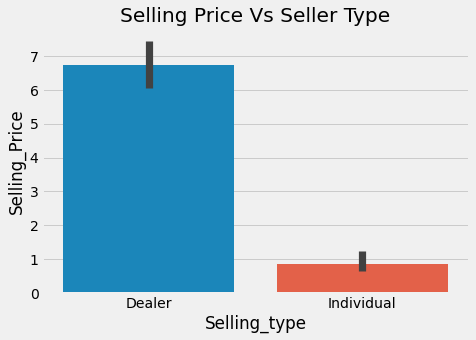

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')
plt.show()

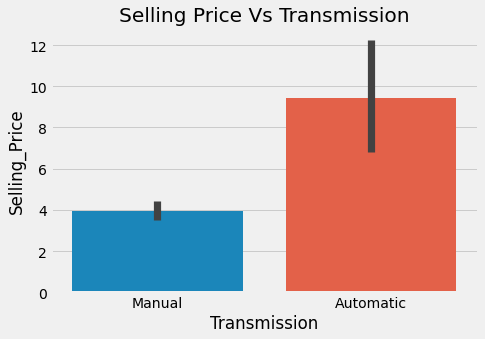

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')
plt.show()


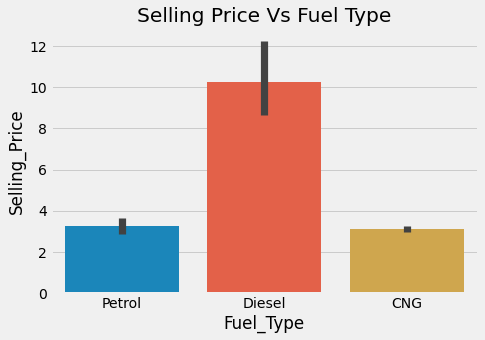

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')
plt.show()

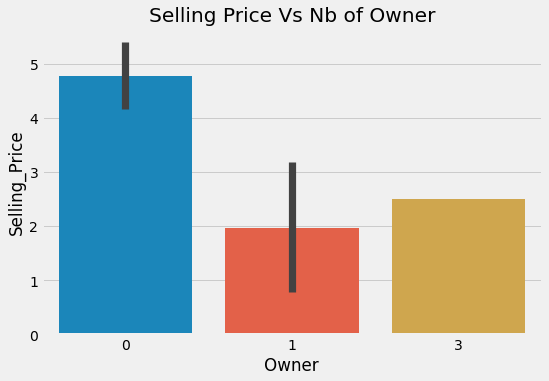

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

**Observations:**

1.We have higher Selling Price when sold by Dealers compared to Individuals

2.Selling Price would be higher for cars that are Automatic.

3.Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

4.Selling Price is high with less Owners used Cars


Text(0.5, 1.0, 'Selling Price Vs Car Age')

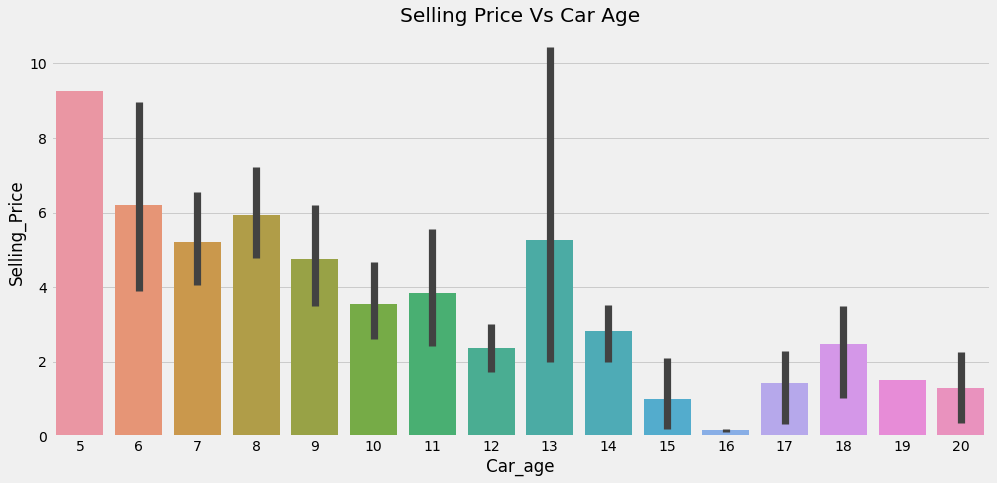

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

**Observations:
Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old**

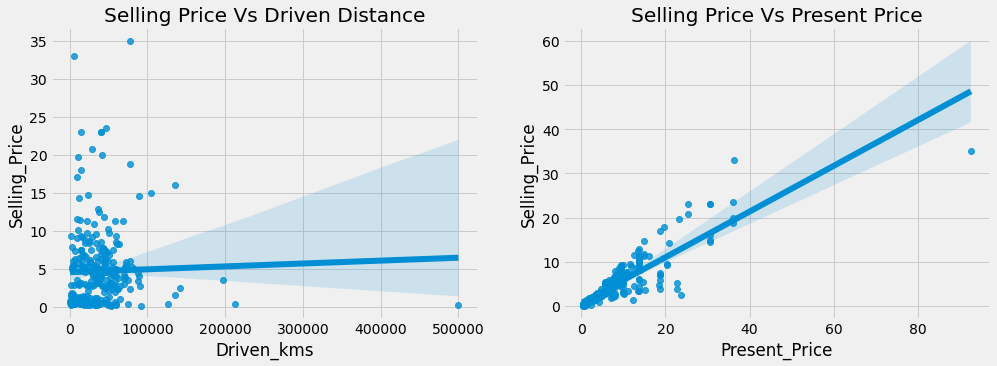

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distance')

plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

**Observations:**
1. Lesser the driven distance, higher the Selling Price.

2. Selling Price tends to increase with increase in the Present Price of cars**

**Dealing with Categorical Variables**

In [ ]:
cat_col = ['Fuel_Type','Selling_type','Transmission','Car_Name']
for i in cat_col:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [ ]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)


In [ ]:
# Dealing With Categorical Variables, creating dummie
col = ['Fuel_Type','Selling_type','Transmission']
df_new = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
df_new.drop(['Fuel_Type','Selling_type','Transmission'],axis=1,inplace=True)
df_new.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type__Diesel,Fuel_Type__Petrol,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


**Checking Multicollinearity Using VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_new[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type__Diesel','Fuel_Type__Petrol','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.211044,Present_Price
1,2.888998,Driven_kms
2,1.086964,Owner
3,16.194782,Car_age
4,5.395420,Fuel_Type__Diesel
5,16.933491,Fuel_Type__Petrol
6,2.231970,Selling_type__Individual
7,8.440614,Transmission__Manual


In [ ]:
# Car_age and fuel_type_petrol feature has high VIF
df_no_multicolinearity = df_new.drop(['Driven_kms','Fuel_Type__Petrol'],axis=1)

In [ ]:
# cheking again after removing some correlated feature
variables = df_new[['Present_Price','Driven_kms','Owner','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.200856,Present_Price
1,1.883550,Driven_kms
2,1.065891,Owner
3,1.669331,Fuel_Type__Diesel
4,1.748706,Selling_type__Individual
5,2.465837,Transmission__Manual


**Now we have VIF < 5 and hence there is no Multicollinearity occurrence in our model**

**Feature Selection:
Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features**

<Axes: >

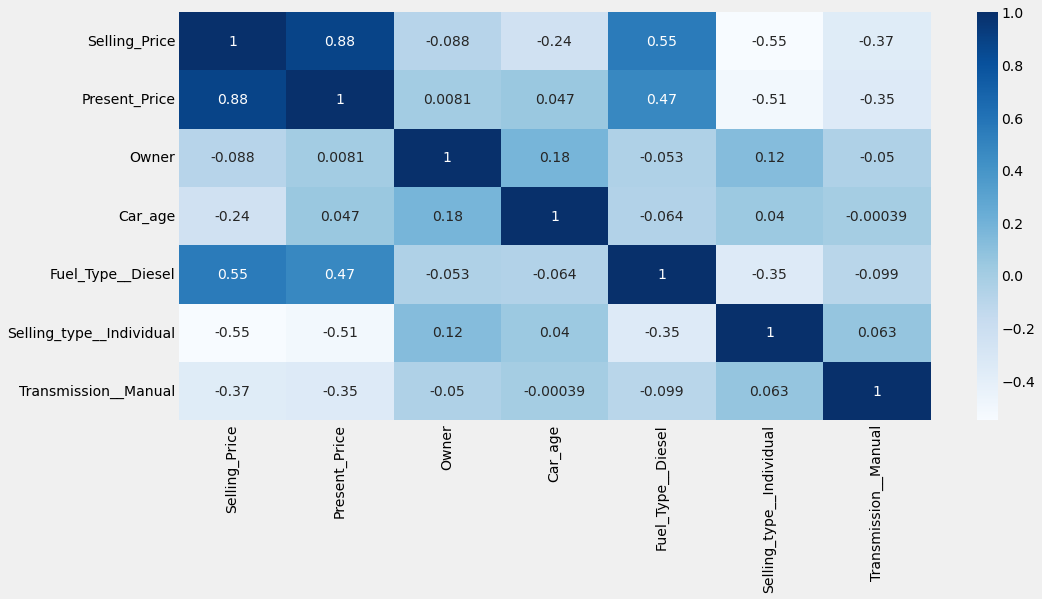

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(df_no_multicolinearity.corr(), annot=True,cmap='Blues')

**Feature Importance:
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.**

In [ ]:
X = df_no_multicolinearity.drop('Selling_Price',axis=1)
y = df_no_multicolinearity['Selling_Price']

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

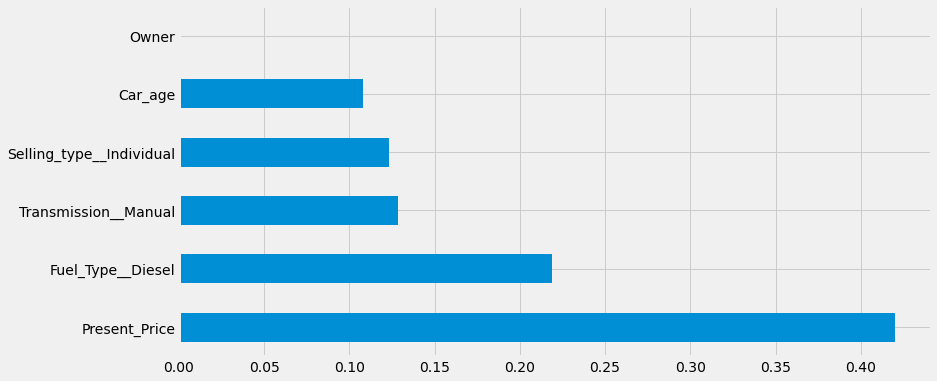

In [ ]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [ ]:
print(feat_importances.sort_values(ascending=False))

Present_Price               0.419832
Fuel_Type__Diesel           0.218754
Transmission__Manual        0.128481
Selling_type__Individual    0.123524
Car_age                     0.108105
Owner                       0.001304
dtype: float64


In [ ]:
# Selecting useful features.
final_df = df_no_multicolinearity[['Selling_Price', 'Present_Price','Car_age','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type__Diesel,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,9,0,0,1
1,4.75,9.54,10,1,0,1
2,7.25,9.85,6,0,0,1
3,2.85,4.15,12,0,0,1
4,4.60,6.87,9,1,0,1


**Model Development**

In [ ]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [ ]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [ ]:
#Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((240, 5), (240,), (61, 5), (61,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.8843830218270095
Predictions are : [ 2.85090216  8.12803353  6.41650528 -0.72103319  9.01800124  7.45747829
  1.32336542  0.65668224  1.34213912  7.4813302   9.09094746  0.49298142
  8.12866516  3.24051879  6.83169728  3.16976577  0.19714116 10.69155693
  1.75733112  2.3029391   0.17755181  8.07727328  6.41650528  2.38200739
  0.70357043  3.5644606   5.30530948  2.68891188  2.15374942  1.7513451
  0.20184841  9.20766793 -0.97424783  2.05714484  8.66976944  4.48435841
  7.34281425  7.35723323  2.96516278  7.7425873   3.60354714  4.10888459
  4.22860468  0.6268443   7.32533886  0.37789223  7.29764953 11.06720188
  3.04615146  5.30397652  6.58815672  2.15374942 20.47942208 16.80427774
  7.66208128  9.62400888  4.34541732  9.01503698  1.41857615  7.45010211
  0.11361337]
R2 score is : 0.8520804961634096
MAE : 1.207955719295842
MSE : 3.407412232827175
RMSE : 1.845917721033951
           Model Name  R2 score       MAE       MSE      RMSE
0  Lin

**Model Comparison**

In [ ]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.971354,0.498727,0.659878,0.812328
2,RandomForestRegressor,0.960552,0.599305,0.908706,0.953261
1,DecisionTreeRegressor,0.944262,0.662623,1.283951,1.133116
4,XGBRegressor,0.935905,0.653831,1.476469,1.215100
0,LinearRegression,0.852080,1.207956,3.407412,1.845918


In [ ]:
#Trainning data with GradientBoostingRegressor
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
df_copy = df.copy()
res = df_copy.merge(out,left_index=True,right_index=True)
res.head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age,Price_actual,Price_pred
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,5,9.25,8.223105
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,8,6.50,6.737466
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,8,7.45,6.550065
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,7,7.75,8.349544
24,2.90,4.41,56879,Petrol,Dealer,Manual,0,10,2.90,2.631044
25,3.00,4.99,20000,Petrol,Dealer,Manual,0,12,3.00,2.548274
33,6.00,9.95,45000,Diesel,Dealer,Manual,0,9,6.00,6.676303
42,1.95,7.15,58000,Petrol,Dealer,Manual,0,15,1.95,2.732159
45,7.50,12.04,15000,Petrol,Dealer,Automatic,0,9,7.50,7.303033
46,2.65,4.89,64532,Petrol,Dealer,Manual,0,10,2.65,2.646367


**Conclusions:**
1. Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
2. Car age is effecting negatively. As older the car lesser the Selling Price.
3. Selling Price of cars with Fuel type Diesel is higher.
4. Car of Manual type is of less priced whereas of Automatic type is high.
5. Cars sold by Individual tend to get less Selling Price when sold by Dealers.